<a href="https://colab.research.google.com/github/Kaustav9820/Kaustav9820/blob/main/Airline_customer_satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
 
uploaded = files.upload()
 
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Case Study_Data.csv to Case Study_Data.csv
User uploaded file "Case Study_Data.csv" with length 468239 bytes


In [4]:
import io
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df=pd.DataFrame(pd.read_csv(io.BytesIO(uploaded['Case Study_Data.csv'])))
df

,Customer ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,88948,Female,Loyal Customer,33,Business travel,Business,1340,2.0,2.0,2.0,2.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,5.0,4.0,3.0,0,0.0,1
4996,102542,Female,Loyal Customer,54,Personal Travel,Eco,223,1.0,4.0,1.0,1.0,2.0,5.0,5.0,5.0,5.0,1.0,5.0,3.0,5.0,5.0,37,28.0,0
4997,31577,Female,disloyal Customer,23,Business travel,Eco,602,2.0,5.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,5.0,4.0,5.0,3.0,2.0,0,0.0,0
4998,19212,Male,Loyal Customer,40,Business travel,Business,459,4.0,4.0,4.0,4.0,4.0,4.0,2.0,5.0,5.0,4.0,5.0,2.0,5.0,2.0,0,0.0,1


In [9]:
le=LabelEncoder()

In [10]:
df.dtypes

Customer ID                            int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                float64
Departure/Arrival time convenient    float64
Ease of Online booking               float64
Gate location                        float64
Food and drink                       float64
Online boarding                      float64
Seat comfort                         float64
Inflight entertainment               float64
On-board service                     float64
Leg room service                     float64
Baggage handling                     float64
Checkin service                      float64
Inflight service                     float64
Cleanliness                          float64
Departure Delay in Minutes             int64
Arrival De

In [13]:
df['Gender_n']=le.fit_transform(df['Gender'])
df['Customer Type_n']=le.fit_transform(df['Customer Type'])
df['Class_n']=le.fit_transform(df['Class'])
df['Type of Travel_n']=le.fit_transform(df['Type of Travel'])

In [14]:
df

,Customer ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_n,Customer Type_n,Class_n,Type of Travel_n
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25,18.0,0,1,0,2,1
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1,6.0,0,1,1,0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0,0.0,1,0,0,0,0
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11,9.0,0,0,0,0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0,0.0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,88948,Female,Loyal Customer,33,Business travel,Business,1340,2.0,2.0,2.0,2.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,5.0,4.0,3.0,0,0.0,1,0,0,0,0
4996,102542,Female,Loyal Customer,54,Personal Travel,Eco,223,1.0,4.0,1.0,1.0,2.0,5.0,5.0,5.0,5.0,1.0,5.0,3.0,5.0,5.0,37,28.0,0,0,0,1,1
4997,31577,Female,disloyal Customer,23,Business travel,Eco,602,2.0,5.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,5.0,4.0,5.0,3.0,2.0,0,0.0,0,0,1,1,0
4998,19212,Male,Loyal Customer,40,Business travel,Business,459,4.0,4.0,4.0,4.0,4.0,4.0,2.0,5.0,5.0,4.0,5.0,2.0,5.0,2.0,0,0.0,1,1,0,0,0


In [ ]:
df=df.drop(['Customer ID','Gender','Type of Travel','Class','Customer Type'],axis=1)

In [22]:
df=pd.DataFrame(df)
df

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_n,Customer Type_n,Class_n,Type of Travel_n
0,13,460,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25,18.0,0,1,0,2,1
1,25,235,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1,6.0,0,1,1,0,0
2,26,1142,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0,0.0,1,0,0,0,0
3,25,562,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11,9.0,0,0,0,0,0
4,61,214,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0,0.0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,33,1340,2.0,2.0,2.0,2.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,5.0,4.0,3.0,0,0.0,1,0,0,0,0
4996,54,223,1.0,4.0,1.0,1.0,2.0,5.0,5.0,5.0,5.0,1.0,5.0,3.0,5.0,5.0,37,28.0,0,0,0,1,1
4997,23,602,2.0,5.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,5.0,4.0,5.0,3.0,2.0,0,0.0,0,0,1,1,0
4998,40,459,4.0,4.0,4.0,4.0,4.0,4.0,2.0,5.0,5.0,4.0,5.0,2.0,5.0,2.0,0,0.0,1,1,0,0,0


In [29]:
df.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Gender_n', 'Customer Type_n', 'Class_n',
       'Type of Travel_n'],
      dtype='object')

In [31]:
se=MinMaxScaler ()
df_n=pd.DataFrame(se.fit_transform(df))
df_n.columns=['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Gender_n', 'Customer Type_n', 'Class_n',
       'Type of Travel_n']
df_n

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_n,Customer Type_n,Class_n,Type of Travel_n
0,0.076923,0.079943,0.6,0.8,0.6,0.00,1.0,0.6,1.00,1.0,0.8,0.6,0.75,0.75,1.0,1.00,0.052083,0.038217,0.0,1.0,0.0,1.0,1.0
1,0.230769,0.034174,0.6,0.4,0.6,0.50,0.2,0.6,0.00,0.2,0.2,1.0,0.50,0.00,0.8,0.00,0.002083,0.012739,0.0,1.0,1.0,0.0,0.0
2,0.243590,0.218674,0.4,0.4,0.4,0.25,1.0,1.0,1.00,1.0,0.8,0.6,0.75,0.75,0.8,1.00,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0
3,0.230769,0.100692,0.4,1.0,1.0,1.00,0.4,0.4,0.25,0.4,0.4,1.0,0.50,0.00,0.8,0.25,0.022917,0.019108,0.0,0.0,0.0,0.0,0.0
4,0.692308,0.029902,0.6,0.6,0.6,0.50,0.8,1.0,1.00,0.6,0.6,0.8,0.75,0.50,0.6,0.50,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.333333,0.258950,0.4,0.4,0.4,0.25,0.8,1.0,1.00,0.8,0.8,0.8,0.75,1.00,0.8,0.50,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0
4996,0.602564,0.031733,0.2,0.8,0.2,0.00,0.4,1.0,1.00,1.0,1.0,0.2,1.00,0.50,1.0,1.00,0.077083,0.059448,0.0,0.0,0.0,0.5,1.0
4997,0.205128,0.108828,0.4,1.0,0.4,0.50,0.4,0.4,0.25,0.4,0.4,1.0,0.75,1.00,0.6,0.25,0.000000,0.000000,0.0,0.0,1.0,0.5,0.0
4998,0.423077,0.079740,0.8,0.8,0.8,0.75,0.8,0.8,0.25,1.0,1.0,0.8,1.00,0.25,1.0,0.25,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


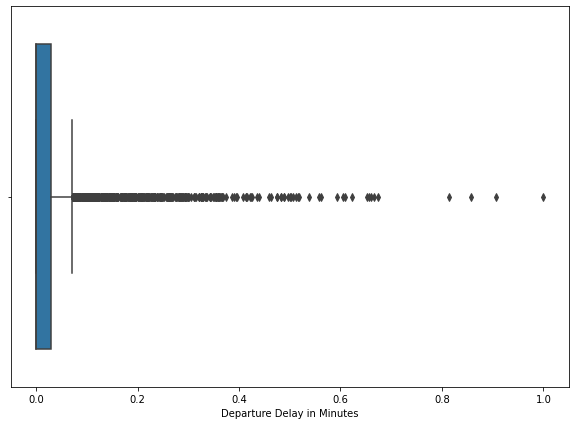

In [36]:
plt.figure(figsize=(10,7))
sns.boxplot(df_n['Departure Delay in Minutes'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


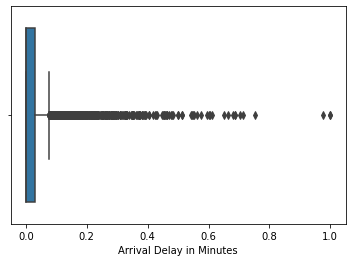

In [37]:
sns.boxplot(df_n['Arrival Delay in Minutes'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

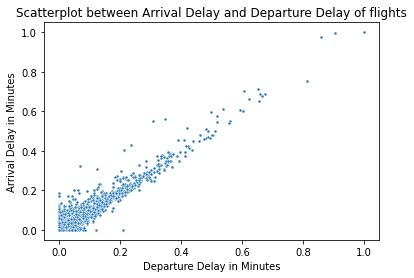

In [143]:
sns.scatterplot(df_n['Departure Delay in Minutes'],df_n['Arrival Delay in Minutes'],marker='.')
plt.title("Scatterplot between Arrival Delay and Departure Delay of flights")
plt.plot()

In [53]:
df_n.isnull().sum

<bound method DataFrame.sum of         Age  Flight Distance  ...  Class_n  Type of Travel_n
0     False            False  ...    False             False
1     False            False  ...    False             False
2     False            False  ...    False             False
3     False            False  ...    False             False
4     False            False  ...    False             False
...     ...              ...  ...      ...               ...
4995  False            False  ...    False             False
4996  False            False  ...    False             False
4997  False            False  ...    False             False
4998  False            False  ...    False             False
4999  False            False  ...    False             False

[5000 rows x 23 columns]>

In [55]:
for i in range(df_n.shape[1]):
  df_n.iloc[:,i]=df_n.iloc[:,i].fillna(df_n.iloc[:,i].median())

In [61]:
df_n=pd.DataFrame(df_n)
df_n

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_n,Customer Type_n,Class_n,Type of Travel_n
0,0.076923,0.079943,0.6,0.8,0.6,0.00,1.0,0.6,1.00,1.0,0.8,0.6,0.75,0.75,1.0,1.00,0.052083,0.038217,0.0,1.0,0.0,1.0,1.0
1,0.230769,0.034174,0.6,0.4,0.6,0.50,0.2,0.6,0.00,0.2,0.2,1.0,0.50,0.00,0.8,0.00,0.002083,0.012739,0.0,1.0,1.0,0.0,0.0
2,0.243590,0.218674,0.4,0.4,0.4,0.25,1.0,1.0,1.00,1.0,0.8,0.6,0.75,0.75,0.8,1.00,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0
3,0.230769,0.100692,0.4,1.0,1.0,1.00,0.4,0.4,0.25,0.4,0.4,1.0,0.50,0.00,0.8,0.25,0.022917,0.019108,0.0,0.0,0.0,0.0,0.0
4,0.692308,0.029902,0.6,0.6,0.6,0.50,0.8,1.0,1.00,0.6,0.6,0.8,0.75,0.50,0.6,0.50,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.333333,0.258950,0.4,0.4,0.4,0.25,0.8,1.0,1.00,0.8,0.8,0.8,0.75,1.00,0.8,0.50,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0
4996,0.602564,0.031733,0.2,0.8,0.2,0.00,0.4,1.0,1.00,1.0,1.0,0.2,1.00,0.50,1.0,1.00,0.077083,0.059448,0.0,0.0,0.0,0.5,1.0
4997,0.205128,0.108828,0.4,1.0,0.4,0.50,0.4,0.4,0.25,0.4,0.4,1.0,0.75,1.00,0.6,0.25,0.000000,0.000000,0.0,0.0,1.0,0.5,0.0
4998,0.423077,0.079740,0.8,0.8,0.8,0.75,0.8,0.8,0.25,1.0,1.0,0.8,1.00,0.25,1.0,0.25,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0


In [62]:
df_n.isnull().sum

<bound method DataFrame.sum of         Age  Flight Distance  ...  Class_n  Type of Travel_n
0     False            False  ...    False             False
1     False            False  ...    False             False
2     False            False  ...    False             False
3     False            False  ...    False             False
4     False            False  ...    False             False
...     ...              ...  ...      ...               ...
4995  False            False  ...    False             False
4996  False            False  ...    False             False
4997  False            False  ...    False             False
4998  False            False  ...    False             False
4999  False            False  ...    False             False

[5000 rows x 23 columns]>

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
w=sm.tools.add_constant(df_n)
w

,const,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_n,Customer Type_n,Class_n,Type of Travel_n
0,1.0,0.076923,0.079943,0.6,0.8,0.6,0.00,1.0,0.6,1.00,1.0,0.8,0.6,0.75,0.75,1.0,1.00,0.052083,0.038217,0.0,1.0,0.0,1.0,1.0
1,1.0,0.230769,0.034174,0.6,0.4,0.6,0.50,0.2,0.6,0.00,0.2,0.2,1.0,0.50,0.00,0.8,0.00,0.002083,0.012739,0.0,1.0,1.0,0.0,0.0
2,1.0,0.243590,0.218674,0.4,0.4,0.4,0.25,1.0,1.0,1.00,1.0,0.8,0.6,0.75,0.75,0.8,1.00,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0
3,1.0,0.230769,0.100692,0.4,1.0,1.0,1.00,0.4,0.4,0.25,0.4,0.4,1.0,0.50,0.00,0.8,0.25,0.022917,0.019108,0.0,0.0,0.0,0.0,0.0
4,1.0,0.692308,0.029902,0.6,0.6,0.6,0.50,0.8,1.0,1.00,0.6,0.6,0.8,0.75,0.50,0.6,0.50,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.0,0.333333,0.258950,0.4,0.4,0.4,0.25,0.8,1.0,1.00,0.8,0.8,0.8,0.75,1.00,0.8,0.50,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0
4996,1.0,0.602564,0.031733,0.2,0.8,0.2,0.00,0.4,1.0,1.00,1.0,1.0,0.2,1.00,0.50,1.0,1.00,0.077083,0.059448,0.0,0.0,0.0,0.5,1.0
4997,1.0,0.205128,0.108828,0.4,1.0,0.4,0.50,0.4,0.4,0.25,0.4,0.4,1.0,0.75,1.00,0.6,0.25,0.000000,0.000000,0.0,0.0,1.0,0.5,0.0
4998,1.0,0.423077,0.079740,0.8,0.8,0.8,0.75,0.8,0.8,0.25,1.0,1.0,0.8,1.00,0.25,1.0,0.25,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0


In [72]:
vif=pd.DataFrame([variance_inflation_factor(w.values,i) for i in range(w.shape[1])])
vif.index=['Constant','Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Gender_n', 'Customer Type_n', 'Class_n',
       'Type of Travel_n']
vif

,0
Constant,43.859685
Age,1.168230
Flight Distance,1.359624
Inflight wifi service,2.452686
Departure/Arrival time convenient,1.667939
Ease of Online booking,2.732460
Gate location,1.543591
Food and drink,2.154852
Online boarding,2.094412
Seat comfort,2.472530


In [73]:
df_N=df_n.drop(['Departure Delay in Minutes','Arrival Delay in Minutes'],axis=1)

In [74]:
df_N

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Gender_n,Customer Type_n,Class_n,Type of Travel_n
0,0.076923,0.079943,0.6,0.8,0.6,0.00,1.0,0.6,1.00,1.0,0.8,0.6,0.75,0.75,1.0,1.00,0.0,1.0,0.0,1.0,1.0
1,0.230769,0.034174,0.6,0.4,0.6,0.50,0.2,0.6,0.00,0.2,0.2,1.0,0.50,0.00,0.8,0.00,0.0,1.0,1.0,0.0,0.0
2,0.243590,0.218674,0.4,0.4,0.4,0.25,1.0,1.0,1.00,1.0,0.8,0.6,0.75,0.75,0.8,1.00,1.0,0.0,0.0,0.0,0.0
3,0.230769,0.100692,0.4,1.0,1.0,1.00,0.4,0.4,0.25,0.4,0.4,1.0,0.50,0.00,0.8,0.25,0.0,0.0,0.0,0.0,0.0
4,0.692308,0.029902,0.6,0.6,0.6,0.50,0.8,1.0,1.00,0.6,0.6,0.8,0.75,0.50,0.6,0.50,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.333333,0.258950,0.4,0.4,0.4,0.25,0.8,1.0,1.00,0.8,0.8,0.8,0.75,1.00,0.8,0.50,1.0,0.0,0.0,0.0,0.0
4996,0.602564,0.031733,0.2,0.8,0.2,0.00,0.4,1.0,1.00,1.0,1.0,0.2,1.00,0.50,1.0,1.00,0.0,0.0,0.0,0.5,1.0
4997,0.205128,0.108828,0.4,1.0,0.4,0.50,0.4,0.4,0.25,0.4,0.4,1.0,0.75,1.00,0.6,0.25,0.0,0.0,1.0,0.5,0.0
4998,0.423077,0.079740,0.8,0.8,0.8,0.75,0.8,0.8,0.25,1.0,1.0,0.8,1.00,0.25,1.0,0.25,1.0,1.0,0.0,0.0,0.0


In [84]:
from scipy import stats
import numpy as np
df_z=np.abs(stats.zscore(df_N))
df_z

array([[1.72211471, 0.74236138, 0.19395878, ..., 0.46944249, 2.25473615,
        1.4985373 ],
       [0.93091741, 0.96715769, 0.19395878, ..., 2.13018638, 0.9375561 ,
        0.66731739],
       [0.8649843 , 0.06097878, 0.55940366, ..., 0.46944249, 0.9375561 ,
        0.66731739],
       ...,
       [1.06278363, 0.60048993, 0.55940366, ..., 2.13018638, 0.65859002,
        0.66731739],
       [0.05807921, 0.74336047, 0.94732122, ..., 0.46944249, 0.9375561 ,
        0.66731739],
       [0.33751944, 1.41668231, 1.3127661 , ..., 0.46944249, 0.9375561 ,
        0.66731739]])

In [86]:
Df=df_N[(df_z<3).all(axis=1)]
Df

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Gender_n,Customer Type_n,Class_n,Type of Travel_n
0,0.076923,0.079943,0.6,0.8,0.6,0.00,1.0,0.6,1.00,1.0,0.8,0.6,0.75,0.75,1.0,1.00,0.0,1.0,0.0,1.0,1.0
1,0.230769,0.034174,0.6,0.4,0.6,0.50,0.2,0.6,0.00,0.2,0.2,1.0,0.50,0.00,0.8,0.00,0.0,1.0,1.0,0.0,0.0
2,0.243590,0.218674,0.4,0.4,0.4,0.25,1.0,1.0,1.00,1.0,0.8,0.6,0.75,0.75,0.8,1.00,1.0,0.0,0.0,0.0,0.0
3,0.230769,0.100692,0.4,1.0,1.0,1.00,0.4,0.4,0.25,0.4,0.4,1.0,0.50,0.00,0.8,0.25,0.0,0.0,0.0,0.0,0.0
4,0.692308,0.029902,0.6,0.6,0.6,0.50,0.8,1.0,1.00,0.6,0.6,0.8,0.75,0.50,0.6,0.50,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.333333,0.258950,0.4,0.4,0.4,0.25,0.8,1.0,1.00,0.8,0.8,0.8,0.75,1.00,0.8,0.50,1.0,0.0,0.0,0.0,0.0
4996,0.602564,0.031733,0.2,0.8,0.2,0.00,0.4,1.0,1.00,1.0,1.0,0.2,1.00,0.50,1.0,1.00,0.0,0.0,0.0,0.5,1.0
4997,0.205128,0.108828,0.4,1.0,0.4,0.50,0.4,0.4,0.25,0.4,0.4,1.0,0.75,1.00,0.6,0.25,0.0,0.0,1.0,0.5,0.0
4998,0.423077,0.079740,0.8,0.8,0.8,0.75,0.8,0.8,0.25,1.0,1.0,0.8,1.00,0.25,1.0,0.25,1.0,1.0,0.0,0.0,0.0


In [89]:
le=LogisticRegression ()
Y=Df['satisfaction']
X=Df.drop('satisfaction',axis=1)

In [159]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
le.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [160]:
le.score(X_train,y_train)

0.8723723723723724

In [161]:
y=le.predict(X_test)
accuracy_score(y,y_test)

0.8718718718718719

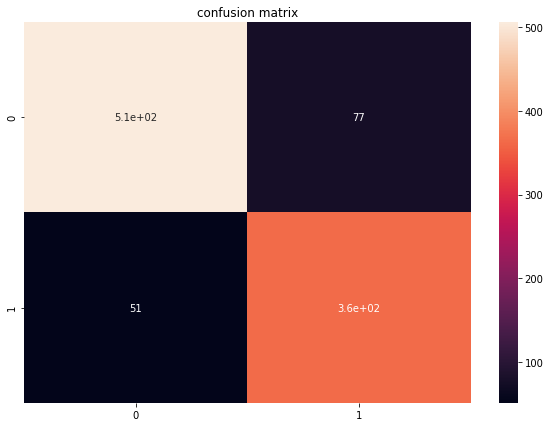

In [162]:
c=confusion_matrix(le.predict(X_test),y_test)
plt.figure(figsize=(10,7))
plt.title("confusion matrix")
sns.heatmap(c,annot=True)

In [172]:
le.predict(X.loc[7:8,:])

array([1., 0.])

In [173]:
Y.loc[7:8]

7    1.0
8    0.0
Name: satisfaction, dtype: float64